## Imports

In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')

### Exploration Data Analysis

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


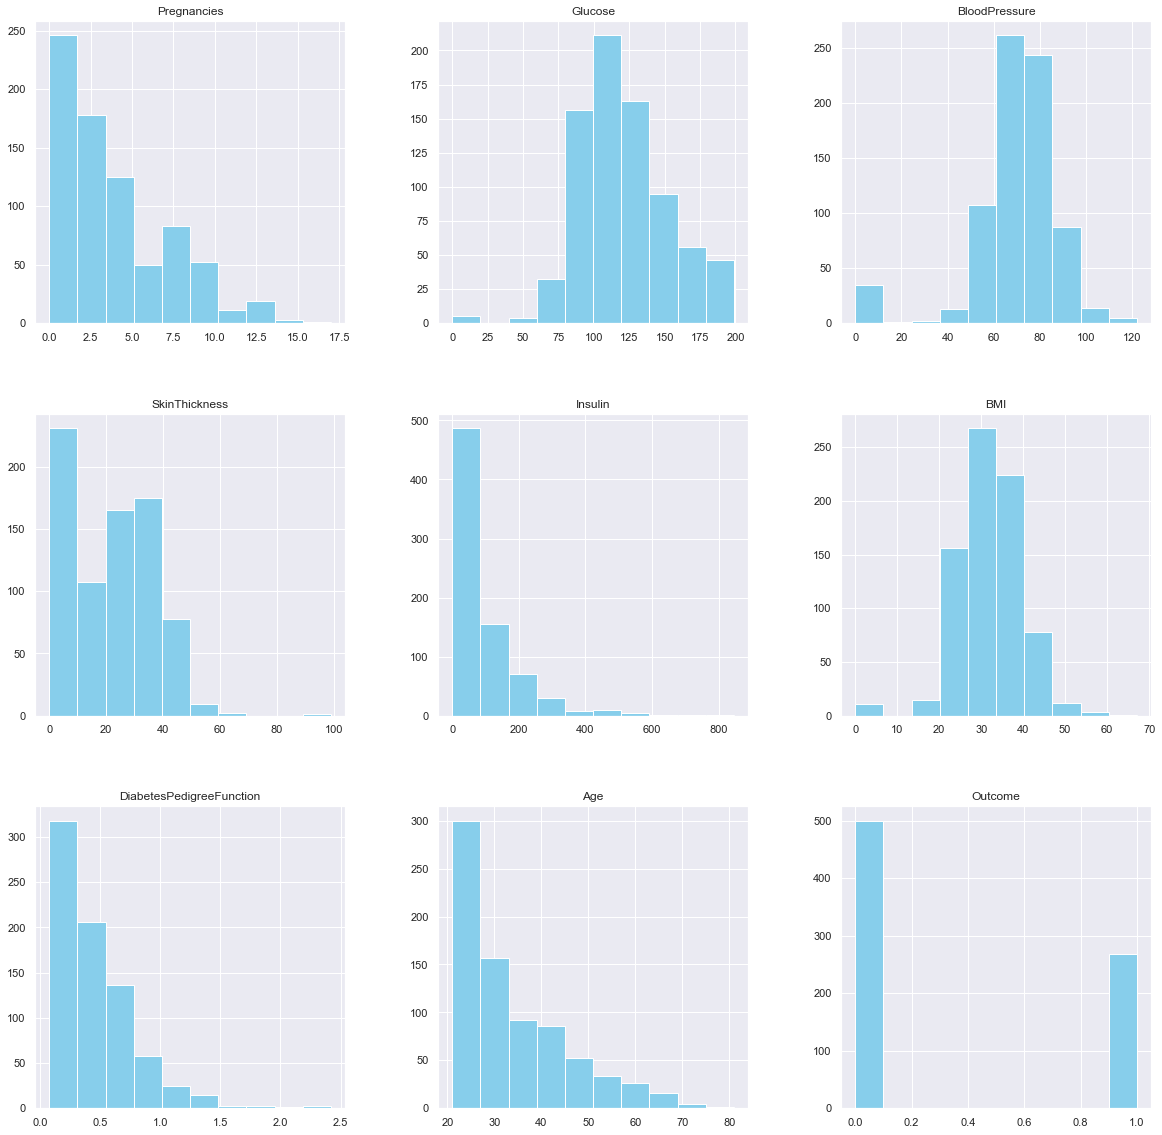

In [6]:
p = data.hist(figsize = (20, 20), color = "skyblue")

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data1 = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0, np.NaN)
# actually the data of diabetes is okay without checking Nan value but since our
# target is to prove it's good if we do feature removing if the Nan value is big
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33


In [9]:
# Removing the data and only left the outcome 
data = data.drop(columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
data.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [10]:
# make new column in data1 as the same as outcome in the data
data1['Outcome'] = data['Outcome']

In [11]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
data1.isnull().sum()
# so the rest data are not listed in the result bellow 
# actually the zero result is the clean data or the data without Nan value

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# Drop most of Nan value feature
data1 = data1.drop(columns = ['SkinThickness','Insulin','Pregnancies'])
data1.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,33.6,0.627,50,1
1,85.0,66.0,26.6,0.351,31,0
2,183.0,64.0,23.3,0.672,32,1
3,89.0,66.0,28.1,0.167,21,0
4,137.0,40.0,43.1,2.288,33,1


In [14]:
data1.isnull().sum()
# because the SkinThickness and Insulin are the most Nan value in the data
# we can drop both feature or variable. and the rest we trying to do replacing 
# the data with mean or median of the data

Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

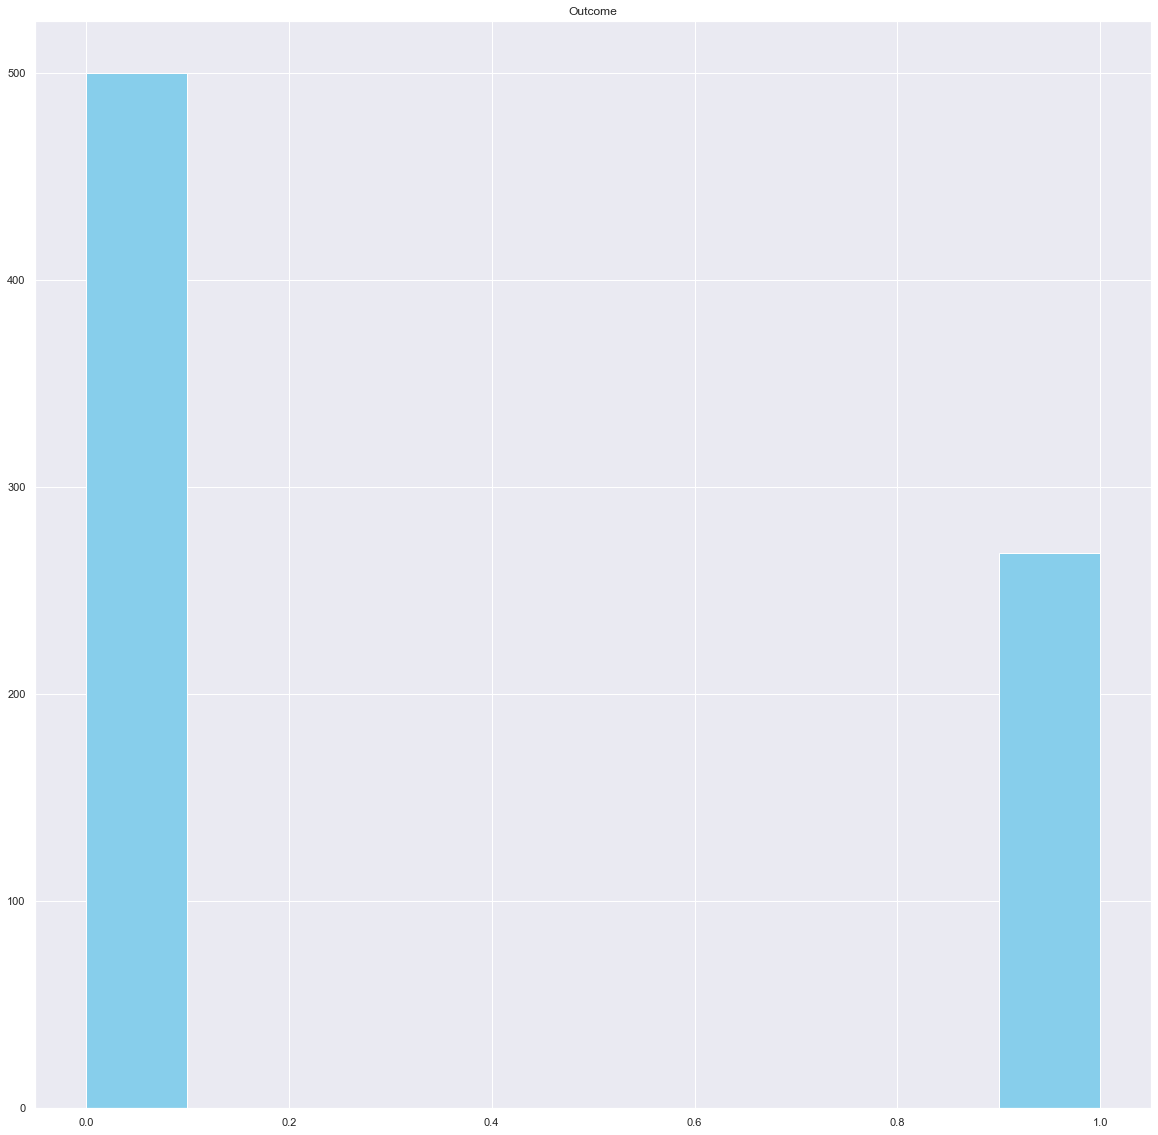

In [15]:
p = data.hist(figsize = (20, 20), color = "skyblue")

#### Manual replacing

In [16]:
# we need revert the data from Nan to zero 0
# data = data[['Glucose','BloodPressure','BMI']].replace(np.NaN, 0)

# data['Glucose'] = data['Glucose'].fillna(0)

In [17]:
# helper for replacing the data

# def replace(dataset, rpl_val):
#     list = []
#     for value in dataset:
#         if value == 0:
#             list.append(rpl_val)
#         else:
#             list.append(value)
#     return list

In [18]:
# print(replace(data['Glucose'], data['Glucose'].mean()))

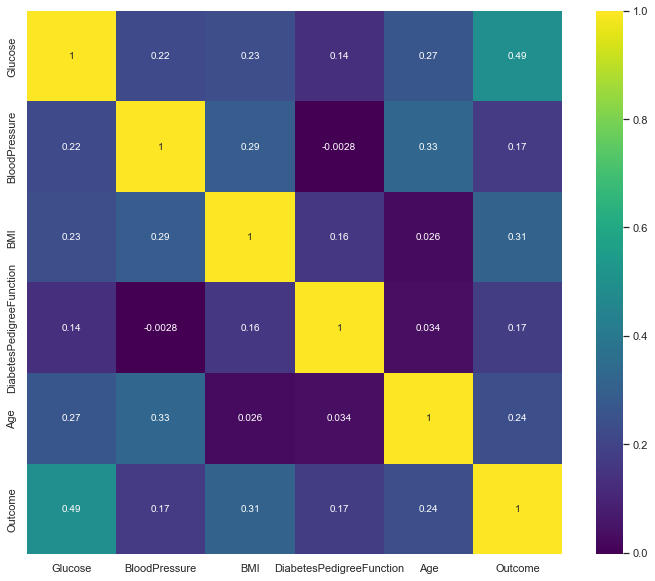

In [19]:
plt.figure(figsize=(12,10))
# on up code line just set the size of figure to 12 by 10
p = sns.heatmap(data1.corr(), annot=True, cmap='viridis')
# seaborn has very simple solution for heatmap

In [20]:
# Replacing the data using dataframe.fillna(newdata) 
# fillna has mean "fill the nan value with"
data1['Glucose'].fillna(data1['Glucose'].mean(), inplace = True) 
data1['BloodPressure'].fillna(data1['BloodPressure'].mean(), inplace = True)
data1['BMI'].fillna(data1['BMI'].median(), inplace = True)

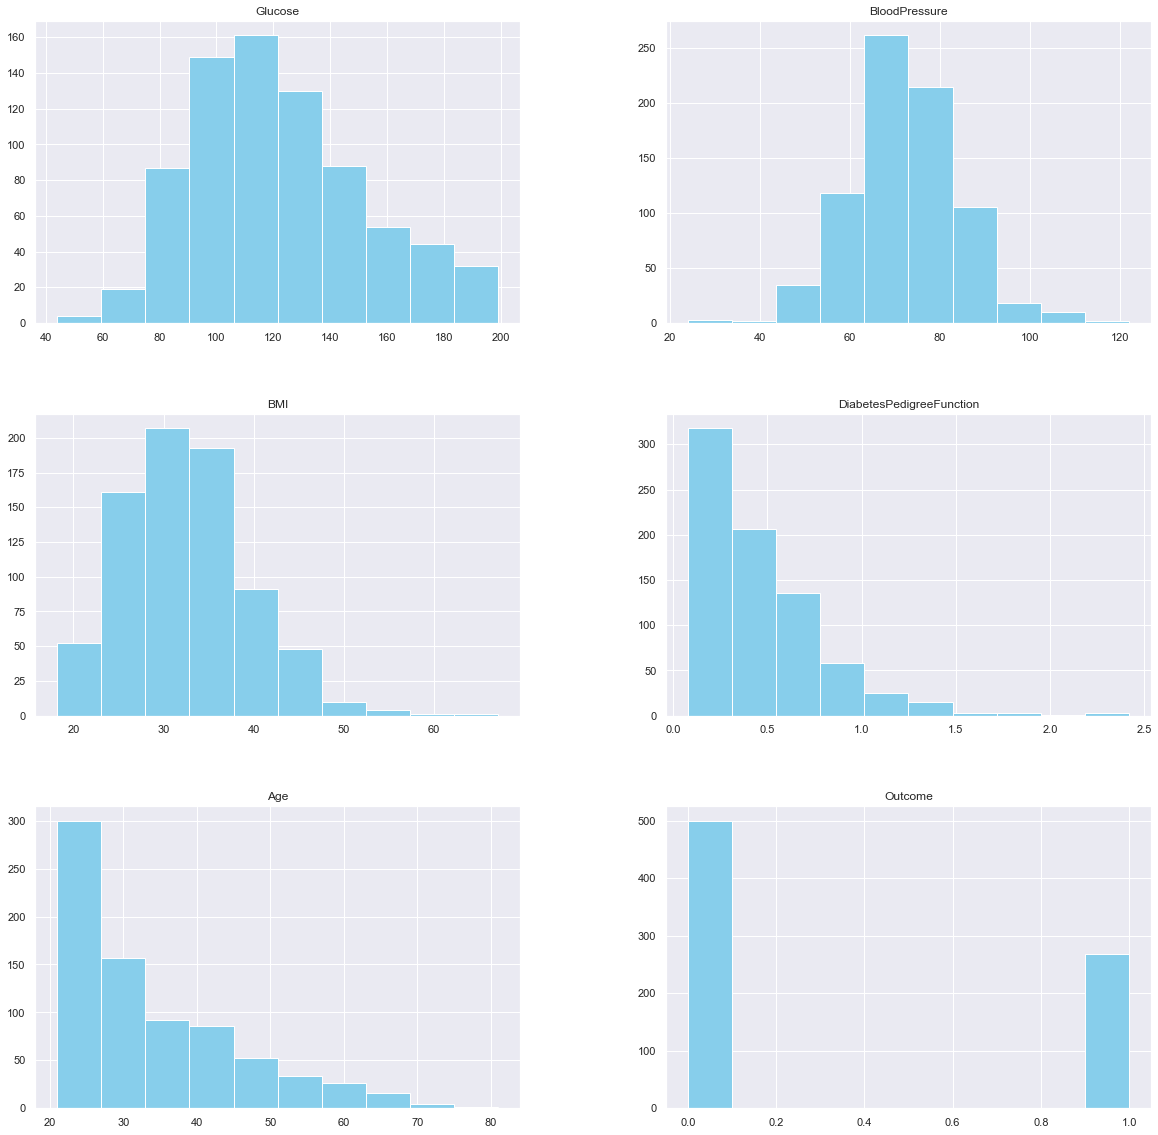

In [21]:
p = data1.hist(figsize = (20, 20), color = "skyblue")

In [22]:
data1.shape

(768, 6)

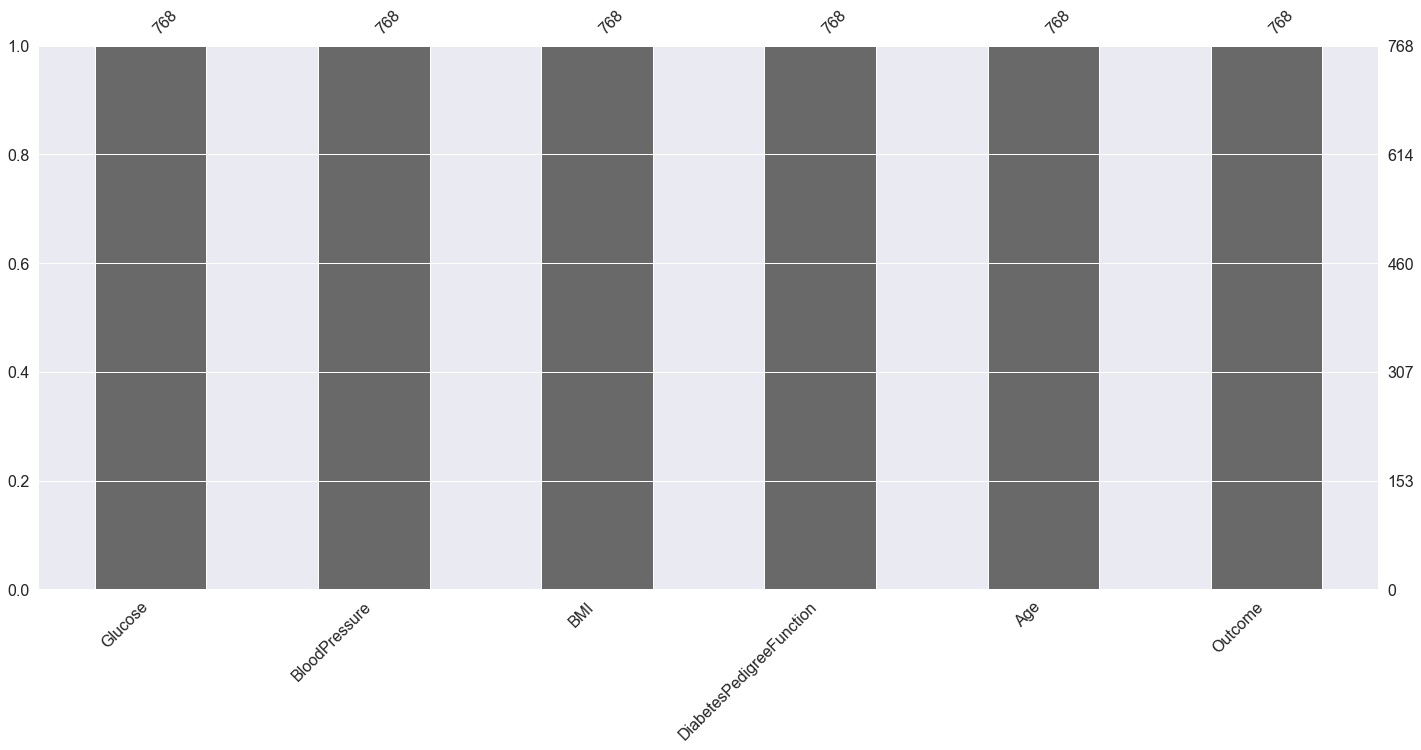

In [23]:
import missingno as msno
p = msno.bar(data1)

0    500
1    268
Name: Outcome, dtype: int64


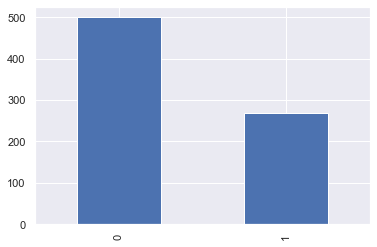

In [24]:
color_wheel = {1: "#9e9b93", 
               2: "#eb152a"}
colors = data1["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data1.Outcome.value_counts())
p = data1.Outcome.value_counts().plot(kind="bar")

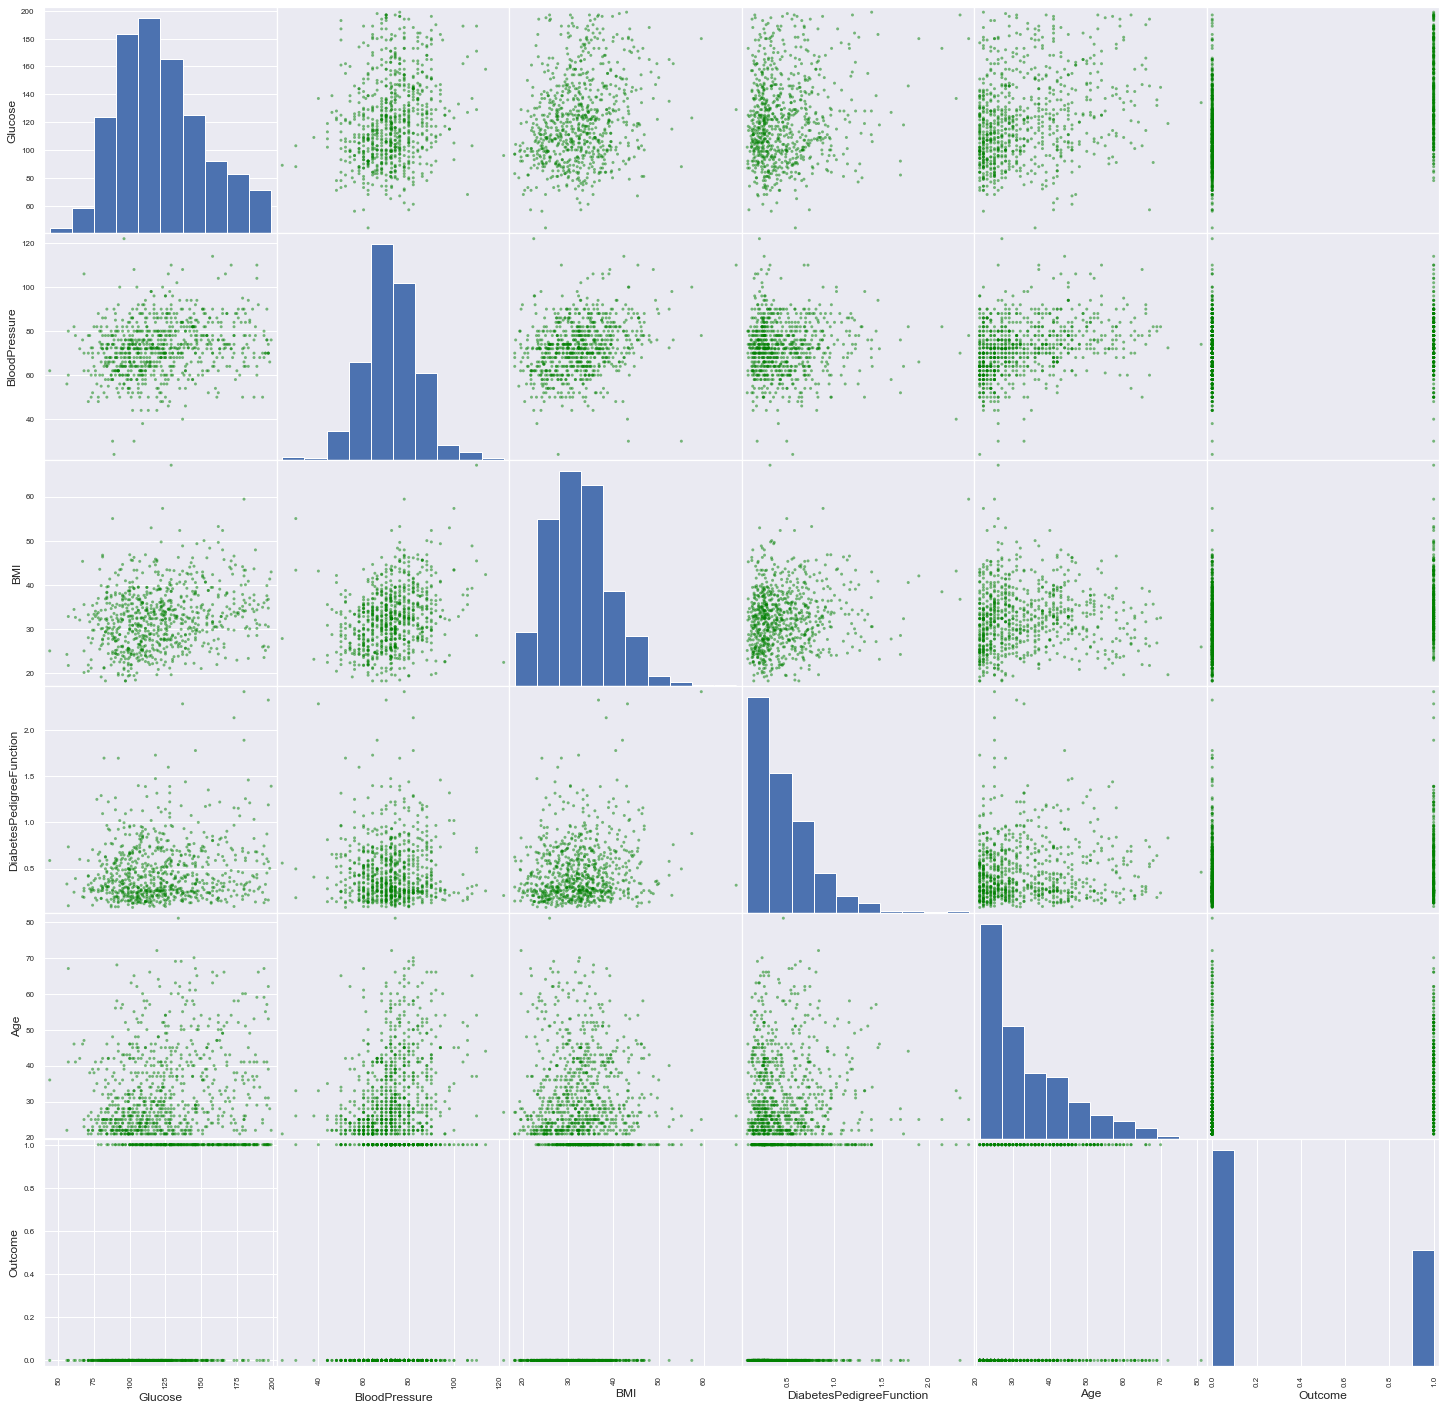

In [25]:
from pandas.plotting import scatter_matrix

p=scatter_matrix(data1,figsize=(25, 25), color = 'green')

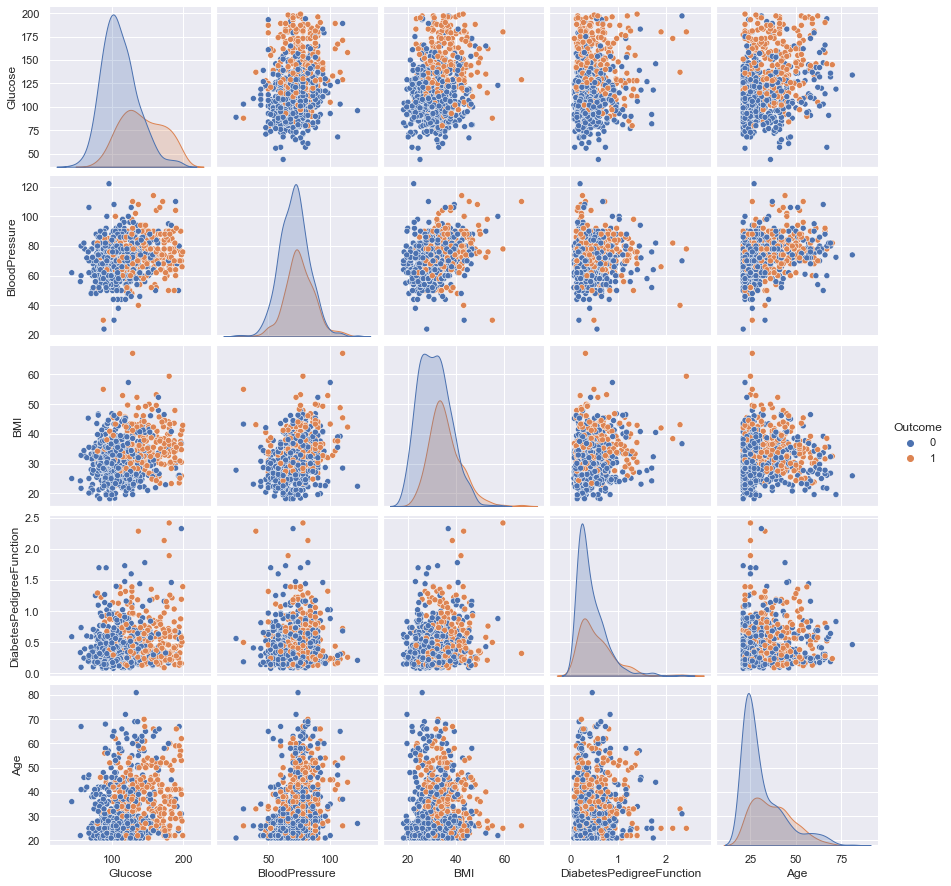

In [26]:
# Pair plot for clean data
p = sns.pairplot(data1, hue = 'Outcome')

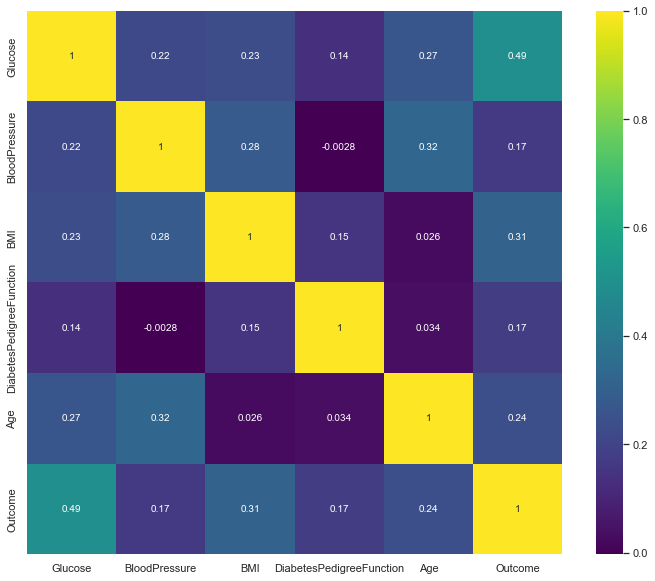

In [27]:
plt.figure(figsize=(12,10))
# on up code line just set the size of figure to 12 by 10
p = sns.heatmap(data1.corr(), annot=True, cmap='viridis')
# seaborn has very simple solution for heatmap

### Preprocessing

In [28]:
# applying standard scaler in this case we use standardize technique
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X =  pd.DataFrame(sc_X.fit_transform(data1.drop(["Outcome"],axis = 1),),
        columns=['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [29]:
X.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.865108,-0.033518,0.166619,0.468492,1.425995
1,-1.206162,-0.529859,-0.852200,-0.365061,-0.190672
2,2.015813,-0.695306,-1.332500,0.604397,-0.105584
3,-1.074652,-0.529859,-0.633881,-0.920763,-1.041549
4,0.503458,-2.680669,1.549303,5.484909,-0.020496


In [30]:
# declare the y as a target of the model
y = data1.Outcome

In [31]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [33]:
print('X_training : ',len(X_train))
print('y_training : ',len(y_train))

X_training :  512
y_training :  512


In [34]:
print('X_testing : ',len(X_test))
print('y_testing : ',len(y_test))

X_testing :  256
y_testing :  256


In [35]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [36]:
max_train_score = max(train_scores)

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [37]:
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
# we can see that we get the improvement from the algorithm by do ing feature reduction
# we also can see that the best n_neighbours value is about 11, 13, 14

Max test score 78.515625 % and k = [11, 13, 14]


### Evaluation

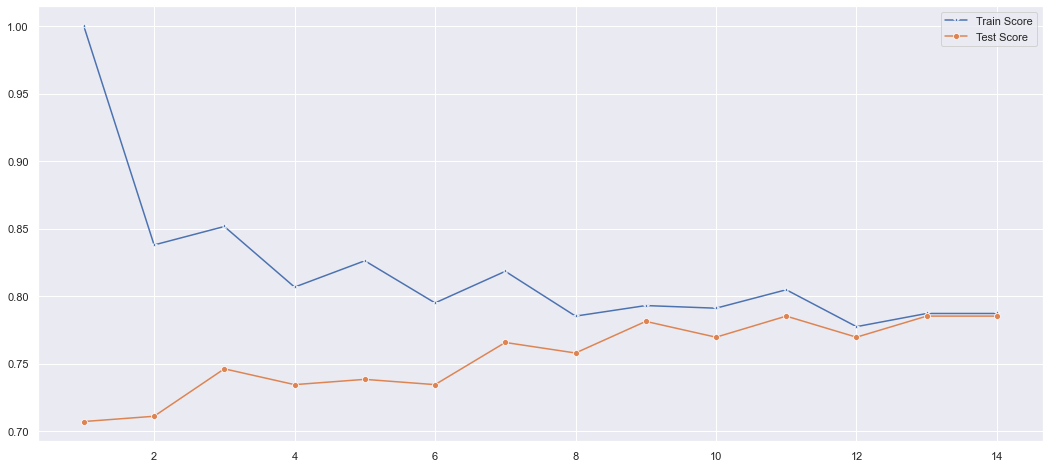

In [38]:
plt.figure(figsize=(18,8))
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score')
# we can see different also in this validation graph here

In [39]:
train_scores

[1.0,
 0.837890625,
 0.8515625,
 0.806640625,
 0.826171875,
 0.794921875,
 0.818359375,
 0.78515625,
 0.79296875,
 0.791015625,
 0.8046875,
 0.77734375,
 0.787109375,
 0.787109375]

In [40]:
test_scores
# we can get the better test score here if we compare the 
# without feature removal the result will be 73%
# and with the feature removal the result can be 78%

[0.70703125,
 0.7109375,
 0.74609375,
 0.734375,
 0.73828125,
 0.734375,
 0.765625,
 0.7578125,
 0.78125,
 0.76953125,
 0.78515625,
 0.76953125,
 0.78515625,
 0.78515625]

In [41]:
average_test = sum(test_scores) / len(test_scores)
average_test
# we can increase 1% from removing three feature

0.7550223214285714

In [42]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.78515625

In [43]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.78515625

In [44]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.78515625

the number parameter of n_neighbors is from the experimental result and the result is about 11, 13, 14

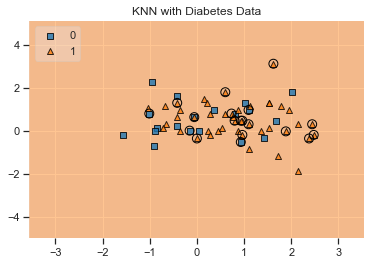

In [45]:
# trying to plot decision boundary
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value},
                      filler_feature_ranges={2: width, 3: width, 4: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [46]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above

y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,151,16,167
1,39,50,89
All,190,66,256


Text(0.5, 12.5, 'Predicted label')

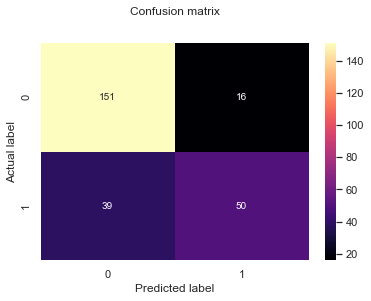

In [47]:
y_pred = knn.predict(X_test) # to predict we must use X_test or maybe our prefer data set

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # make confusion matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="magma" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# we have little increasement from the predicting 0 classification
# but we have bad result in predicting 1 classification

In [48]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       167
           1       0.76      0.56      0.65        89

    accuracy                           0.79       256
   macro avg       0.78      0.73      0.75       256
weighted avg       0.78      0.79      0.78       256



In [49]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

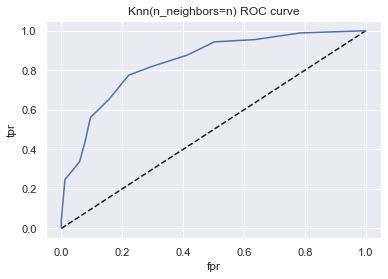

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=n) ROC curve')
plt.show()

In [51]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.840308147749445

### Hyperparameters using GridSearchCV

In [52]:
# applying the grid search method
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7747984042101688
Best Parameters: {'n_neighbors': 44}


### Conclusion

we can see even there slightly improvement in the score actually KNN algorithm is not really care about the missing data but that mean in still in the value of number but like 0 not Nan. In this experiment actually the main target is to understand well about if the Nan value of the data is to much we can remove the specifict feature or variable. there some algorithm that tolerate with the null value which is Naive Bayes and KNN algorithm.